### Viz tile 2107

In [ ]:
import sys
import os
import csv
import gzip
import scipy.io
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pickle
from matplotlib.colors import LinearSegmentedColormap
import timeit
# start = timeit.default_timer()
# stop = timeit.default_timer()
# print('Time: ', stop - start)

In [2]:
# transparent background
plt.rcParams.update({
    "figure.facecolor":  (0.0, 0.0, 0.0, 0.0),  
    "axes.facecolor":    (0.0, 0.0, 0.0, 0.0),  
})

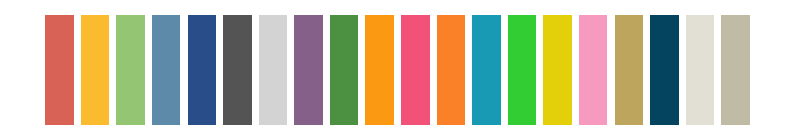

In [3]:
# define colors
purple = '#856088'
pink = '#F25278'
red = '#d96256'
lightgreen = '#93c572'
darkgreen = '#4c9141'
lightblue = '#5d8aa8'
darkblue = '#284d88'
white = '#fafafa'
lightgray = '#d3d3d3'
darkgray ='#545454'
lightorange = '#fabc2e'
darkorange = '#fb9912'
lightyellow = '#e4d00a'
lightgreen2 = '#32CD32'
lightblue2 = '#189AB4'
darkblue2 = '#05445E'
lightpink = '#F79AC0'
darkorange2 = '#FA8128'
darkyellow = '#BDA55D'
lightgray2 = '#E2E0D4'
lightgray3 = '#BFBBA4'

colors = [
    red, lightorange, lightgreen, lightblue, darkblue, 
    darkgray, lightgray, purple, darkgreen, darkorange,
    pink, darkorange2, lightblue2, lightgreen2, lightyellow,
    lightpink, darkyellow, darkblue2, lightgray2, lightgray3
]

plt.figure(figsize=(10, 1.5))
plt.bar(range(len(colors)), height=1, color=colors)
__ = plt.axis('off')

In [4]:
# custom colormap
start_color = (1, 1, 1, 0)
end_color = (0, 0, 0, 1)
cmap_black = LinearSegmentedColormap.from_list('alpha_colormap', [start_color, end_color], N=10)

start_color = (1, 1, 1, 0)
end_color = (154/255, 154/255, 154/255, 1)
cmap_gray = LinearSegmentedColormap.from_list('alpha_colormap', [start_color, end_color], N=10)

start_color = (1, 1, 1, 0)
end_color = (192/255, 54/255, 44/255, 1)
cmap_red = LinearSegmentedColormap.from_list('alpha_colormap', [start_color, end_color], N=10)

start_color = (1, 1, 1, 0)
end_color = (76/255, 145/255, 65/255, 1)
cmap_green = LinearSegmentedColormap.from_list('alpha_colormap', [start_color, end_color], N=10)

start_color = (1, 1, 1, 0)
end_color = (50/255, 205/255, 50/255, 1)
cmap_lightgreen = LinearSegmentedColormap.from_list('alpha_colormap', [start_color, end_color], N=10)

start_color = (1, 1, 1, 0)
end_color = (46/255, 88/255, 158/255, 1)
cmap_blue = LinearSegmentedColormap.from_list('alpha_colormap', [start_color, end_color], N=10)

#### load data

In [5]:
# gene expr data
path = '../step9_segNucleus/out/df_dict.pkl'
df = pd.read_pickle(path)['df']

df2107 = df[df.tile==2107]
df2107.head(2)

geneID  tile      x      y  umi
24   Xkr4  2107  29424  12953    1
33   Xkr4  2107  25305   6296    1

In [6]:
# croped gene expr
path = '../enhanced_tile2107_4X_crop_dd200_max95Q_QC95Q.pkl'
df_crop2107 = pd.read_pickle(path)['df_seg_2107']
df_crop2107.head(2)

geneID  tile      x      y  umi  cell  centerX  centerY
39   Xkr4  2107   7378  11172    1  3301        0        0
44   Xkr4  2107  18999   7177    1  1780        0        0

In [7]:
# sp/unsp data
path = '../unsp_dict.pkl'
pickle_dict = pd.read_pickle(path)
unsp_df = pickle_dict['unsp_df'] 
sp_df = pickle_dict['sp_df'] 

unsp_df2107 = unsp_df[unsp_df.tile==2107]
sp_df2107 = sp_df[sp_df.tile==2107]
unsp_df2107.head(2)

tile      x      y  umi
6   2107   5148  15125    1
11  2107  20256   6571    2

In [8]:
# seg
path = '../masks_4X_tile2107_dict.pkl'
pickle_dict = pd.read_pickle(path)
im2107 = pickle_dict['im2107']
outline2107 = pickle_dict['outline2107']
mask2107 = pickle_dict['mask2107']
unspMat2107 = pickle_dict['unspMat2107']

In [6]:
##### gene lists
geneUnique = df['geneID'].unique().tolist()
# 10 nucleus genes
nucleus10List = ['Neat1', 'Malat1', 'Mlxipl', 'n-R5-8s1', 'Gm24601', 'Echdc2', 'D4Wsu53e', 'Aspg', 'Mafb', 'Sema4g']
# 36 mt genes
mt36List = [s for i, s in enumerate(geneUnique) if s.startswith('mt-')]
print(f'mt: #{len(mt36List)} {mt36List}')
# PC markers (Figure 4E)
PC7List = ['Glul', 'Oat', 'Cyp2a5', 'Mup9', 'Mup17', 'Cyp2c29', 'Cyp2e1']
# PP markers (Figure 4E)
PP7List = ['Mup20', 'Alb', 'Cyp2f2', 'Serpina1e', 'Ass1', 'Hamp', 'Mup11']

mt: ['mt-Tf', 'mt-Rnr1', 'mt-Tv', 'mt-Rnr2', 'mt-Tl1', 'mt-Nd1', 'mt-Ti', 'mt-Tq', 'mt-Tm', 'mt-Nd2', 'mt-Tw', 'mt-Ta', 'mt-Tn', 'mt-Tc', 'mt-Ty', 'mt-Co1', 'mt-Ts1', 'mt-Td', 'mt-Co2', 'mt-Tk', 'mt-Atp8', 'mt-Atp6', 'mt-Co3', 'mt-Tg', 'mt-Nd3', 'mt-Tr', 'mt-Nd4l', 'mt-Nd4', 'mt-Th', 'mt-Ts2', 'mt-Tl2', 'mt-Nd5', 'mt-Nd6', 'mt-Te', 'mt-Cytb', 'mt-Tt', 'mt-Tp']


#### plot

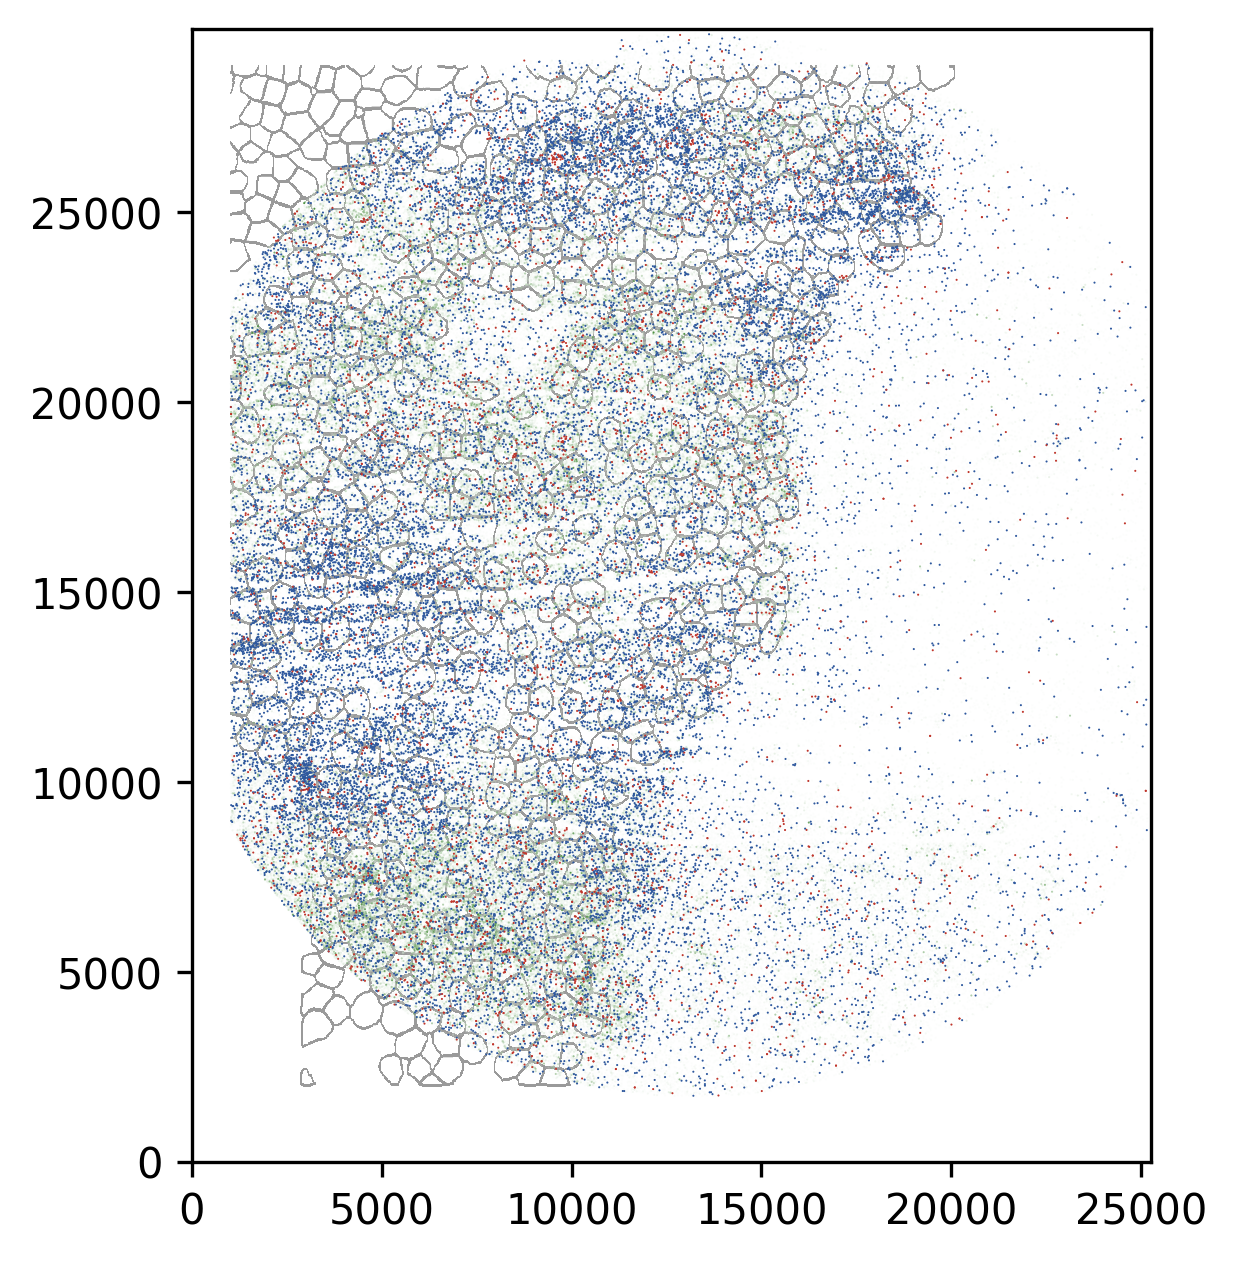

In [10]:
# full tile
nr = 1
nc = 1
ss_nr = 5
ss_nc = 5
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

# PC marker
gl = PC7List
df_g = df2107[df2107.geneID.isin(gl)]
ax.scatter(df_g.y, 
           df_g.x,
           c=df_g.umi,
           vmin=0,
           vmax=1,
           s=1,
           zorder=3,
           marker = '.',
           edgecolors='none',
           cmap=cmap_blue)

# PP marker
gl = PP7List
df_g = df2107[df2107.geneID.isin(gl)]
ax.scatter(df_g.y, 
           df_g.x,
           c=df_g.umi,
           vmin=0,
           vmax=8,
           s=1,
           zorder=2,
           marker = '.',
           edgecolors='none',
           cmap=cmap_green)

# nuclear 10 genes
gl = nucleus10List
df_g = df2107[df2107.geneID.isin(gl)]
ax.scatter(df_g.y, 
           df_g.x,
           c=df_g.umi,
           vmin=0,
           vmax=1,
           s=1,
           zorder=4,
           marker = '.',
           edgecolors='none',
           cmap=cmap_red)

ax.imshow(outline2107,
          vmin=0,
          vmax=2,
          cmap=cmap_gray,
          zorder=1,
          origin='lower')

ax.set_aspect('equal', adjustable='box')
# fig.savefig('./figs/tile2107.png', dpi=300)

/tmp/ipykernel_3580110/2362821328.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_g = df2107[(df2107.geneID.isin(gl))&(df.x>=24000)&(df.x<=28000)&(df.y>=7500)&(df.y<=12000)]
/tmp/ipykernel_3580110/2362821328.py:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_g = df2107[(df2107.geneID.isin(gl))&(df.x>=24000)&(df.x<=28000)&(df.y>=7500)&(df.y<=12000)]


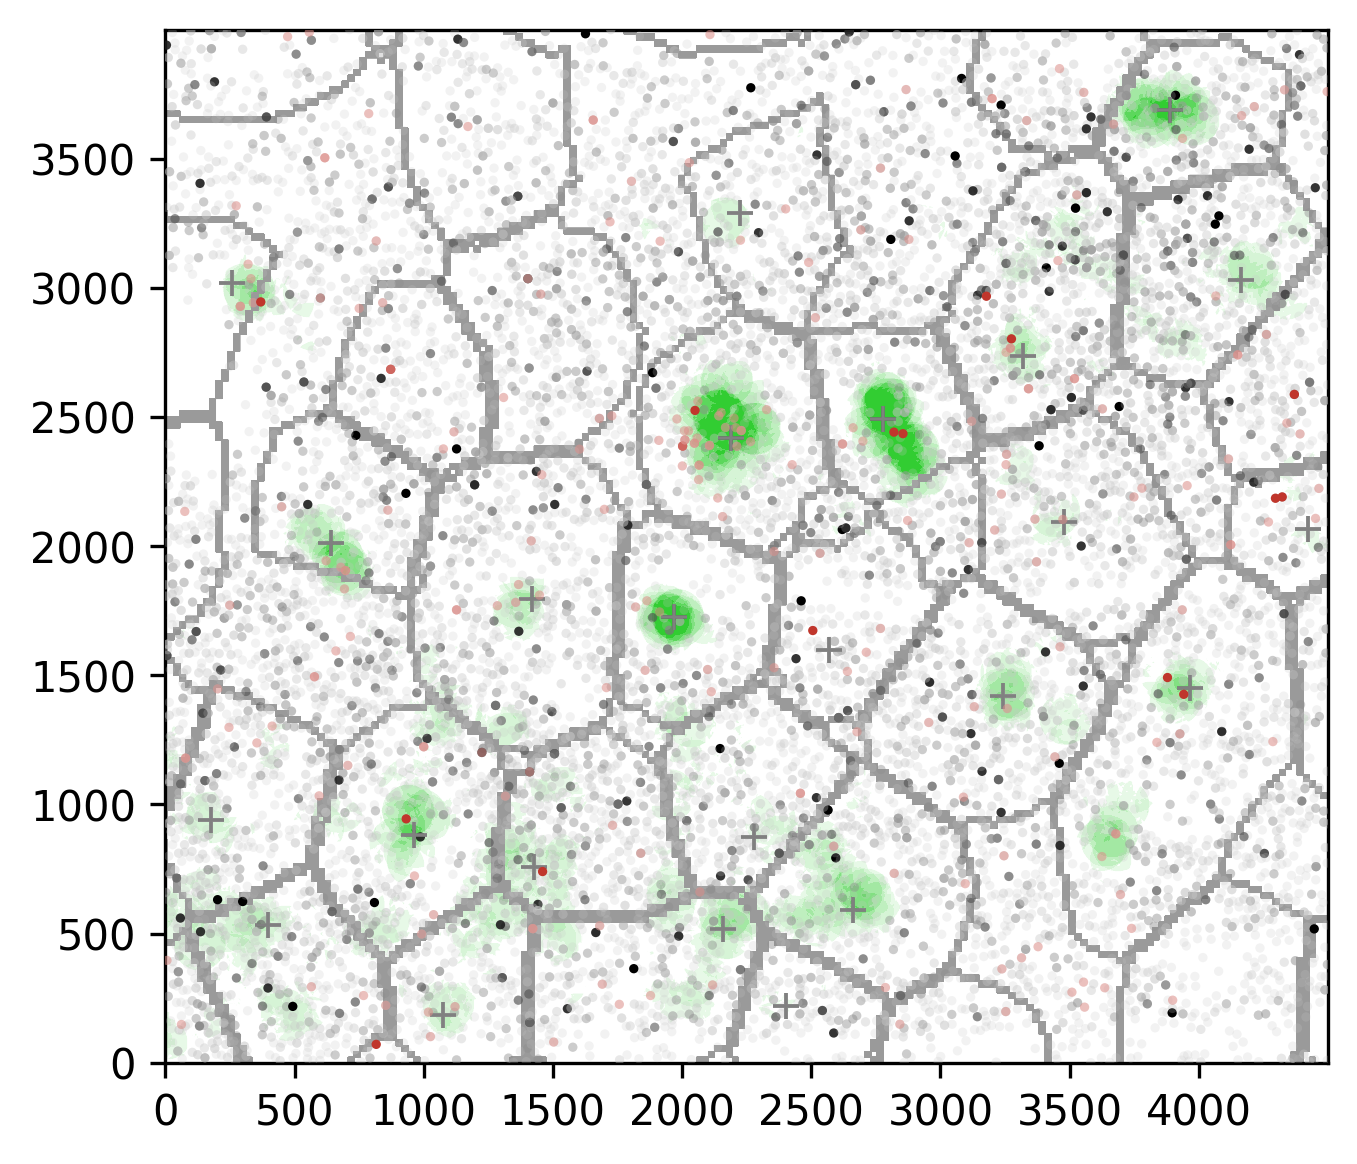

In [11]:
# zoom in gene expr
nr = 1
nc = 1
ss_nr = 5
ss_nc = 5
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

gl=mt36List
df_g = df2107[(df2107.geneID.isin(gl))&(df.x>=24000)&(df.x<=28000)&(df.y>=7500)&(df.y<=12000)]
ax.scatter(df_g.y-7500, 
           df_g.x-24000,
           c=df_g.umi,
           vmin=0,
           vmax=5,
           s=5,
           zorder=3,
           marker = 'o',
           edgecolors='none',
           cmap=cmap_black)

# nuclear 10 genes
gl = nucleus10List
df_g = df2107[(df2107.geneID.isin(gl))&(df.x>=24000)&(df.x<=28000)&(df.y>=7500)&(df.y<=12000)]
ax.scatter(df_g.y-7500, 
           df_g.x-24000,
           c=df_g.umi,
           vmin=0,
           vmax=2,
           s=5,
           zorder=5,
           marker = 'o',
           edgecolors='none',
           cmap=cmap_red)

# nuclear center
df_g = df_crop2107[(df_crop2107.centerX>=24000)&(df_crop2107.centerX<=28000)&(df_crop2107.centerY>=7500)&(df_crop2107.centerY<=12000)]
ax.scatter(df_g.centerY-7500,
           df_g.centerX-24000,
           s=40,
           linewidth=0.5,
           color='gray',
           zorder=4,
           marker='+')

ax.imshow(outline2107[24000:28000, 7500:12000],
          vmin=0,
          vmax=2,
          cmap=cmap_gray,
          zorder=1,
          origin='lower')

ax.imshow((unspMat2107*(unspMat2107>np.quantile(unspMat2107, 0.95)))[24000:28000, 7500:12000],
          vmin=0,
          vmax=100,
          cmap=cmap_lightgreen,
          origin='lower')

ax.set_aspect('equal', adjustable='box')
# fig.savefig('./figs/tile2107_zoomexpr.png', dpi=300)

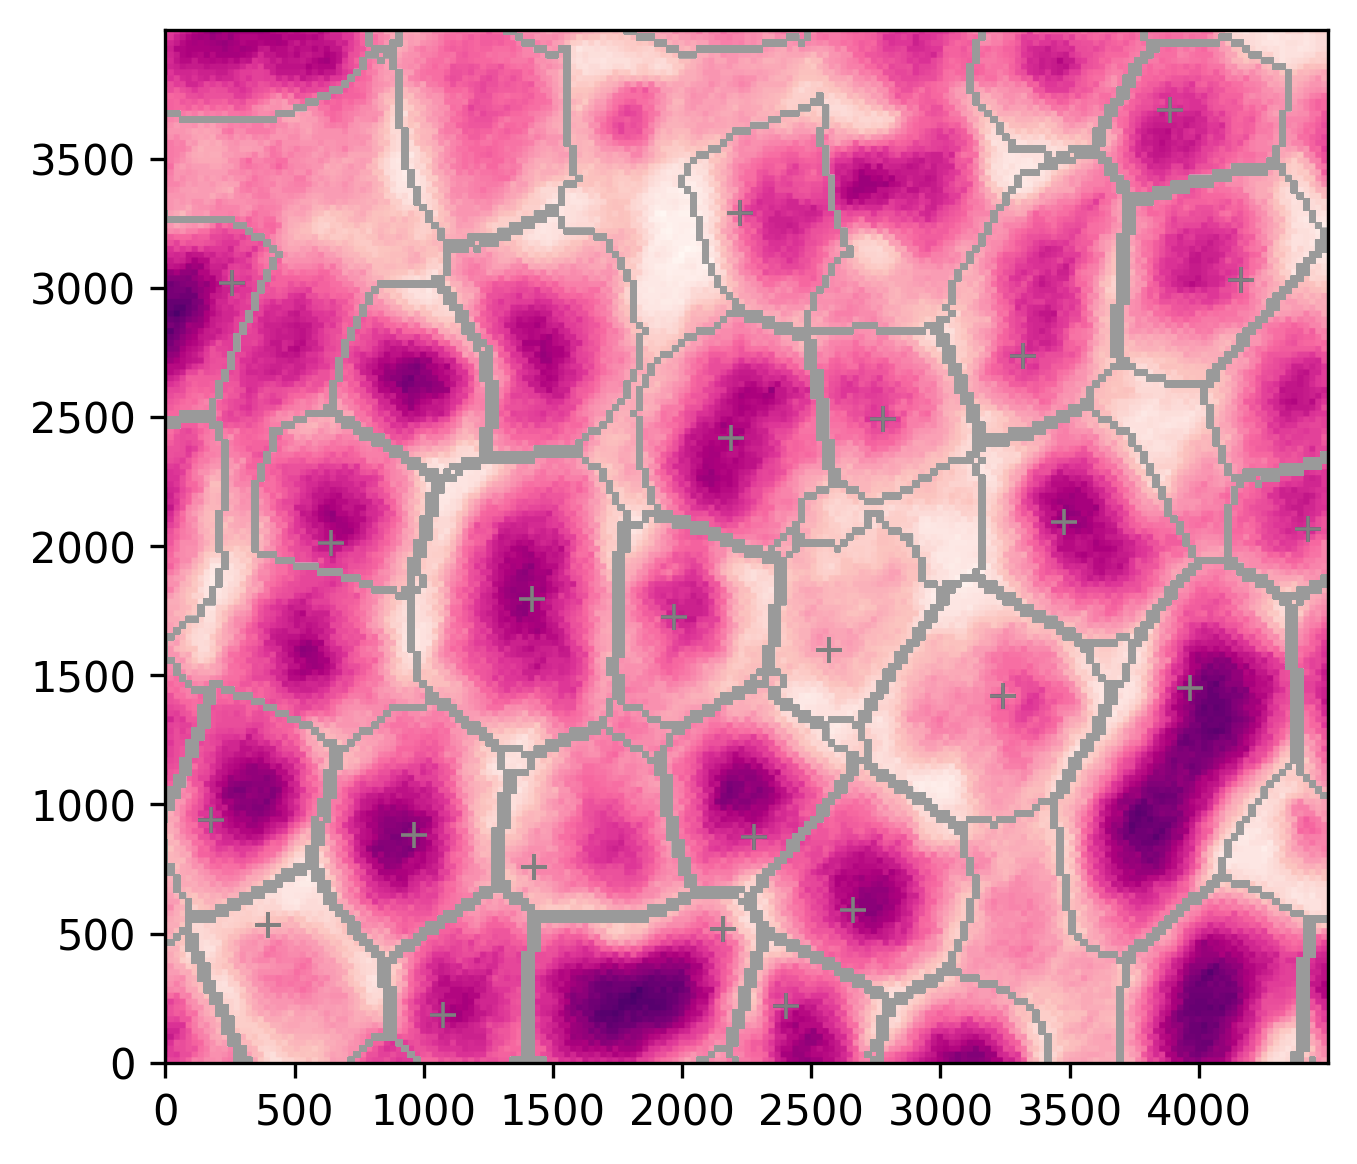

In [12]:
# zoom in H&E
nr = 1
nc = 1
ss_nr = 5
ss_nc = 5
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

ax.imshow(np.max(im2107[24000:28000, 7500:12000])-im2107[24000:28000, 7500:12000],
          zorder=1,
          cmap='RdPu',
          origin='lower')

ax.imshow(outline2107[24000:28000, 7500:12000],
          vmin=0,
          vmax=2,
          cmap=cmap_gray,
          zorder=2,
          origin='lower')

# nuclear center
df_g = df_crop2107[(df_crop2107.centerX>=24000)&(df_crop2107.centerX<=28000)&(df_crop2107.centerY>=7500)&(df_crop2107.centerY<=12000)]
ax.scatter(df_g.centerY-7500,
           df_g.centerX-24000,
           s=40,
           linewidth=0.5,
           color='gray',
           zorder=4,
           marker='+')

ax.set_aspect('equal', adjustable='box')
# fig.savefig('./figs/tile2107_zoomhe.png', dpi=300)